In [174]:
import torch 
import torchvision 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as func
import torchvision.transforms as transform
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import cv2
%matplotlib inline 

In [175]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu") #, google colab is cutting off my gpu usage. 
#device = torch.device('cpu')

In [176]:
# hyper-parameters
num_epochs = 30
batch_size = 50
learning_rate = 0.01
classes = ['airplane', 'automobile',	'bird', 'cat', 'deer'	,'dog', 'frog', 'horse', 'ship','truck'] # https://www.cs.toronto.edu/~kriz/cifar.html

In [177]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [178]:
train_data = datasets.CIFAR10('./', download=True, train=True, transform=transform)
test_data = datasets.CIFAR10('./', download=True, train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False , num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [179]:
checkdata = iter(train_loader)
img, label = next(checkdata)

dog
bird
dog
ship


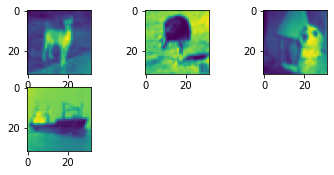

In [180]:
for i in range(1,5):
  print(classes[label[i].item()])
  plt.subplot(3, 3, i)
  plt.imshow(img[i][0])
plt.show()

In [181]:
# class Model(nn.Module):
#   def __init__(self):
#     super(Model, self).__init__()
#     self.conv1 = nn.Conv2d(3, 6, 5)
#     self.pool = nn.MaxPool2d(2,2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16 * 5 * 5, 150)
#     self.fc2 = nn.Linear(150, 75)
#     self.fc3 = nn.Linear(75, 10)

#   def forward(self, x):
#     model = self.pool(func.relu(self.conv1(x))) 
#     model = self.pool(func.relu(self.conv2(model)))
#     model = model.view(-1, 16*5*5)
#     model = func.relu(self.fc1(model))
#     model = func.relu(self.fc2(model))
#     model = self.fc3(model)
#     return model

In [182]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    # self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    # self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
    # self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
    # self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(64*8*8, 1024)
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)

  def forward(self, x):
    model = self.pool(func.relu(self.conv1(x)))
    model = self.pool(func.relu(self.conv2(model)))
    #print(model.size())
    #model = self.pool(func.relu(self.conv3(model)))
    # model = self.pool(func.relu(self.conv4(model)))
    # model = func.relu(self.conv5(model))
    # model = self.pool(func.relu(self.conv6(model)))

    model = model.view(-1, 64*8*8)
    model = func.relu(self.fc1(model))
    model = func.relu(self.fc2(model))
    model = self.fc3(model)
    
    return model

In [183]:
model = Model().to(device)

In [184]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [185]:
len(train_data)

50000

In [186]:
total_steps = len(train_loader)

for epoch in range(1, num_epochs + 1):
  for steps, (images, labels) in enumerate(train_loader, start = 1):
    images = images.to(device)
    labels = labels.to(device)

    # forward pass 
    predictions = model(images)
    loss = criterion(predictions, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 100 == 0: 
      print("Epochs {}/{}, Steps: {}/{}, Loss: {:.4f}".format(epoch, num_epochs, steps, len(train_loader), loss))


Epochs 1/30, Steps: 100/1000, Loss: 2.3046
Epochs 1/30, Steps: 200/1000, Loss: 2.2974
Epochs 1/30, Steps: 300/1000, Loss: 2.2509
Epochs 1/30, Steps: 400/1000, Loss: 2.1920
Epochs 1/30, Steps: 500/1000, Loss: 2.0972
Epochs 1/30, Steps: 600/1000, Loss: 2.0350
Epochs 1/30, Steps: 700/1000, Loss: 2.0686
Epochs 1/30, Steps: 800/1000, Loss: 1.9727
Epochs 1/30, Steps: 900/1000, Loss: 1.9362
Epochs 1/30, Steps: 1000/1000, Loss: 1.8845
Epochs 2/30, Steps: 100/1000, Loss: 1.9830
Epochs 2/30, Steps: 200/1000, Loss: 1.7976
Epochs 2/30, Steps: 300/1000, Loss: 1.6783
Epochs 2/30, Steps: 400/1000, Loss: 1.4761
Epochs 2/30, Steps: 500/1000, Loss: 1.7002
Epochs 2/30, Steps: 600/1000, Loss: 1.6449
Epochs 2/30, Steps: 700/1000, Loss: 1.6185
Epochs 2/30, Steps: 800/1000, Loss: 1.5990
Epochs 2/30, Steps: 900/1000, Loss: 1.8020
Epochs 2/30, Steps: 1000/1000, Loss: 1.3317
Epochs 3/30, Steps: 100/1000, Loss: 1.2716
Epochs 3/30, Steps: 200/1000, Loss: 1.6525
Epochs 3/30, Steps: 300/1000, Loss: 1.3905
Epochs 3/

In [187]:

correct = 0
with torch.no_grad():
  for (images, labels) in test_loader: # batch training loop 
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images) 

      _, test_predicted = torch.max(outputs.data,1)

      correct += torch.eq(labels, test_predicted).sum()


accuracy = (correct/len(test_data)).item() * 100 
print("Model has {:.2f} % accuracy".format(accuracy))

Model has 72.97 % accuracy


In [188]:
torch.save(model, './my_mnist_model.pt') 